In [9]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys, os

sys.path.append('./Data_Generation/')
from distribution_features import get_vObs, f_SHM, f_GF

sys.path.append('./Coarse_Scan/')
import coarseScanner

In [32]:
c = 299792.458

ma = 5.5e5*2*np.pi
A = 5000.0
PSDback= .1 #163539.36

v0_Halo = 220.0
vDotMag_Halo = 232.36
alpha_Halo =  .49
tbar_Halo = 72.40

v0_Stream = 10.0
vDotMag_Stream = 418.815
alpha_Stream = 0.65903
tbar_Stream = 279.51
fracStream = 0.05

freqs = np.linspace(.99998, 1.00002, 10000)*5.5e5
num_stacked = 10*86400.0 * (freqs[1] - freqs[0])
includeGF = False

In [33]:
def get_PSD():
    PSD  = np.zeros((365, len(freqs)))
    
    for iDay in range(365):

        vObs_Halo = get_vObs(vDotMag_Halo, alpha_Halo, tbar_Halo, iDay)
        vObs_Stream = get_vObs(vDotMag_Stream, alpha_Stream, tbar_Stream, iDay)

        for iFrq in range(len(freqs)):
            mean = PSDback        

            freq = freqs[iFrq]
            vSq = 2.0*(2.0*np.pi*freq-ma)/ma

            if vSq > 0:
                v = np.sqrt(vSq)
                mean += A * np.pi *((1.0-fracStream)*f_SHM(v, v0_Halo/c, vObs_Halo/c) + fracStream*f_SHM(v, v0_Stream, vObs_Stream))/ ma / v           

                if includeGF:
                    mean += A * np.pi *((1.0-fracStream)*f_GF(v, v0_Halo, iDay) + fracStream*f_GF(v, v0_Stream, iDay))/ ma / v

            PSD[iDay, iFrq] = np.random.gamma(num_stacked, mean)/num_stacked
    
    return PSD


In [34]:
Unstacked_PSD = get_PSD()
stacked_PSD = np.mean(Unstacked_PSD, axis = 0)

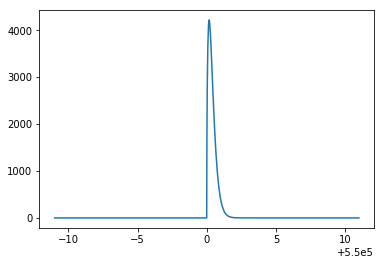

In [35]:
plt.plot(freqs, stacked_PSD)
plt.show()

In [57]:
mass_TestSet = np.linspace(.9999, 1.00001, 10)*ma
A_TestSet = np.linspace(.5, 1.5, 400)*A

In [59]:
TS = np.array(coarseScanner.TS_Scan(stacked_PSD, freqs, mass_TestSet, A_TestSet, PSDback, v0_Halo, vDotMag_Halo, num_stacked*365))

1 of 10
2 of 10
3 of 10
4 of 10
5 of 10
6 of 10
7 of 10
8 of 10
9 of 10
10 of 10


In [54]:
A_TestSet[191]

4893.4837092731832

In [48]:
A_TestSet[20]

5064.1025641025635

In [44]:
A

5000.0